# Agrarian structure in three colombian sub-regions: North Cauca, Tequendama, and south Atlántico 


In this project I perform a general characterization and comparison of the agrarian structure in some colombian subregions. Specifically, I want to assess:
 1. How does property regimes affect agrarian structure in these subregions and how are they different between each other?
 2. What is the relationship between farm size and agricultural output?
 3. What are some socioeconomic factors that drive agrarian structural difference?
 4. How does the agrarian productive inputs (i.e. labour, machinery, etc.) behave between these regions and what is their effect in agricultural output?

The selection of these regions is not random. Different historical backgrounds and socioeconomic conditions have shaped these regions in different ways. For instance, North Cauca's agricultural development has evolved from monocrops (mainly sugarcane plantations) based primarily in colonial family houses to commodity industrial complexes. On the other hand, Tequendama region was shaped by small farmer colonizations and peasant economies predominate.

With this in mind, this report is divided into four main sections: Besides from this Introduction, there's a data preparation and processing stage where I handle datasets uploading and variable formatting and adjustments. Next, I analyze the main issues of this research, dealing with data calculations, exploratory data analysis and regression analyses. Finally, I prepare the most insightful vizualisations of the analysis stage and present some concluding remarks. 

## Main libraries


In [104]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Initial setup

## Data preparation

- Loading datasets
- Adjusting variables

In [105]:
## Cauca datasets
ncupa_df = pd.read_csv('upa_nc_cna2014.csv', sep = ';')
ncrops_df = pd.read_csv('cultivos_nc_cna2014.csv', sep = ';')

ncupa_df.head()

,Column1,TIPO_REG,PAIS,P_DEPTO,P_MUNIC,UC_UO,ENCUESTA,COD_VEREDA,COD_PARQUE,PRED_ETNICA,...,P_S12P145,P_S12P146,P_S12P147,P_S12P148,P_S12P149,P_S12P150A,P_S15P158,P_S15P158A,P_S15P158B,TIPO_UC
0,54227,1,170,19,19110,0,1165708,19110001,NaN,7,...,522.099601,103.266835,0.000000,0.000000,0.0,2.288153e+04,1,1,5,1
1,54228,1,170,19,19110,0,1820547,19110035,NaN,6,...,356210.900590,817671.667640,0.000000,55.526975,0.0,1.384584e+06,0,0,0,1
2,54229,1,170,19,19110,0,2047350,19698026,NaN,7,...,702.829939,0.000000,0.000000,22.247410,0.0,1.525371e+04,1,1,2,1
3,54230,1,170,19,19110,0,2047483,19110037,NaN,2,...,9475.427917,2723.915020,23.799664,21.213124,0.0,3.091238e+04,1,1,4,1
4,54231,1,170,19,19110,0,2048796,19110045,NaN,7,...,210.789970,0.000000,0.000000,0.000000,0.0,3.805378e+03,1,1,3,1


In [106]:
## Tequendama datasets
tqupa_df = pd.read_csv('upa_tq_cna2014.csv', sep = ';')
tqcrops_df = pd.read_csv('cultivos_tq_cna2014.csv', sep = ';')

tqcrops_df.head()

,TIPO_REG,PAIS,P_DEPTO,P_MUNIC,UC_UO,ENCUESTA,COD_VEREDA,P_S6P45B,P_S6P45A,P_S6P46,...,P_S6P50,P_S6P51_SP1,P_S6P51_SP2,P_S6P51_SP3,P_S6P53,P_S6P57A,P_S6P59_UNIF,P_S6P60,AREA_SEMBRADA,AREA_COSECHADA
0,4,170,25,25035,10000,83146534,25245031,1,2,9999999901,...,3.0,NaN,1.0,NaN,NaN,0.001184,0.335816,NaN,0.003526,0.003526
1,4,170,25,25035,10000,83150114,25035019,1,1,131901001,...,2.0,NaN,1.0,NaN,NaN,0.027187,1.914366,12.0,0.014201,0.014201
2,4,170,25,25035,10000,83150114,25035019,1,1,132401001,...,2.0,NaN,1.0,NaN,NaN,0.214324,15.091752,12.0,0.014201,0.014201
3,4,170,25,25035,10000,83150114,25035019,2,1,192908001,...,NaN,NaN,NaN,NaN,NaN,0.198510,0.925533,NaN,0.214482,0.214482
4,4,170,25,25035,10001,60460899,25035022,1,1,132301002,...,NaN,NaN,NaN,NaN,NaN,3.232922,11.554133,NaN,0.279807,0.279807


In [107]:
## South Atlántico datasets
saupa_df = pd.read_csv('upa_sa_cna2014.csv', sep = ';')
sacrops_df = pd.read_csv('cultivos_sa_cna2014.csv', sep = ';')

saupa_df.head()

,TIPO_REG,PAIS,P_DEPTO,P_MUNIC,UC_UO,ENCUESTA,COD_VEREDA,COD_PARQUE,PRED_ETNICA,P_S3P9,...,P_S12P145,P_S12P146,P_S12P147,P_S12P148,P_S12P149,P_S12P150A,P_S15P158,P_S15P158A,P_S15P158B,TIPO_UC
0,1,170,8,8137,10001,40069408,8137003,NaN,6,1,...,24405.823268,31332.287433,482.835162,0.0,0.0,86868.767802,1,2,2,1
1,1,170,8,8137,20001,40068730,8137003,NaN,7,2,...,0.000000,0.000000,0.000000,0.0,0.0,80200.784833,0,0,0,1
2,1,170,8,8137,20776,40068736,8137003,NaN,7,1,...,14991.820241,0.000000,0.000000,0.0,0.0,77099.497927,0,0,0,1
3,1,170,8,8137,30001,48818,8137003,NaN,7,2,...,0.000000,0.000000,0.000000,0.0,0.0,43957.735393,0,0,0,1
4,1,170,8,8137,30001,40068729,8137003,NaN,7,1,...,2463.913963,0.000000,0.000000,0.0,0.0,42100.098103,0,0,0,1


## Data processing

In [108]:
# Adding 'municipios' variable
ncupa_df['municipio'] = ncupa_df['P_MUNIC'].replace([19110, 19137, 19142, 19212, 19300, 19364, 19455, 19513, 19573, 19698, 19780, 19821, 19845], ['Buenos Aires', 'Caldono', 'Caloto', 'Corinto', 'Guachené', 'Jambaló', 'Miranda', 'Padilla', 'Puerto Tejada', 'Santander de Quilichao', 'Suárez', 'Toribio', 'Villa Rica'])
ncrops_df['municipio'] = ncrops_df['P_MUNIC'].replace([19110, 19137, 19142, 19212, 19300, 19364, 19455, 19513, 19573, 19698, 19780, 19821, 19845], ['Buenos Aires', 'Caldono', 'Caloto', 'Corinto', 'Guachené', 'Jambaló', 'Miranda', 'Padilla', 'Puerto Tejada', 'Santander de Quilichao', 'Suárez', 'Toribio', 'Villa Rica'])
tqupa_df['municipio'] = tqupa_df['P_MUNIC'].replace([25035, 25040, 25599, 25123, 25245, 25386, 25596, 25645, 25878, 25797], ['Anapoima', 'Anolaima', 'Apulo', 'Cachipay', 'El Colegio', 'La Mesa', 'Quipile', 'San Antonio Del Tequendama', 'Viotá', 'Tena'])
tqcrops_df['municipio'] = tqcrops_df['P_MUNIC'].replace([25035, 25040, 25599, 25123, 25245, 25386, 25596, 25645, 25878, 25797], ['Anapoima', 'Anolaima', 'Apulo', 'Cachipay', 'El Colegio', 'La Mesa', 'Quipile', 'San Antonio Del Tequendama', 'Viotá', 'Tena'])
saupa_df['municipio'] = saupa_df['P_MUNIC'].replace([8137, 8141, 8421, 8436, 8606, 8675, 8770], ['Campo De La Cruz', 'Candelaria', 'Luruaco', 'Manatí', 'Repelón', 'Santa Lucía', 'Suan'])
sacrops_df['municipio'] = sacrops_df['P_MUNIC'].replace([8137, 8141, 8421, 8436, 8606, 8675, 8770], ['Campo De La Cruz', 'Candelaria', 'Luruaco', 'Manatí', 'Repelón', 'Santa Lucía', 'Suan'])


In [109]:
# Adding 'regimen' variable
ncupa_df['regimen'] = ncupa_df['S05_TENENCIA'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 99], ['Propia' , 'Arriendo' , 'Aparcería' , 'Usufructo' , 'Comodato' , 'Ocupación de hecho' , 'Propiedad colectiva' , 'Adjudicatario o comunero' , 'Otra forma de tenencia' , 'Mixta' , 'No sabe'])
tqupa_df['regimen'] = tqupa_df['S05_TENENCIA'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 99], ['Propia' , 'Arriendo' , 'Aparcería' , 'Usufructo' , 'Comodato' , 'Ocupación de hecho' , 'Propiedad colectiva' , 'Adjudicatario o comunero' , 'Otra forma de tenencia' , 'Mixta' , 'No sabe'])
saupa_df['regimen'] = saupa_df['S05_TENENCIA'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 99], ['Propia' , 'Arriendo' , 'Aparcería' , 'Usufructo' , 'Comodato' , 'Ocupación de hecho' , 'Propiedad colectiva' , 'Adjudicatario o comunero' , 'Otra forma de tenencia' , 'Mixta' , 'No sabe'])

In [110]:
# Adding 'etnia' variable
ncupa_df['etnia'] = ncupa_df['PRED_ETNICA'].replace([1, 2, 3, 4, 5, 6, 7, 9], ['Resguardo Indígena' , 'Asentamiento indígena' , 'Parcialidad indígena' , 'Territorio Indígena diferente a los anteriores' , 'Territorios Colectivos de Comunidades Negras Titulados' , 'Territorios de Ocupación Colectiva de Comunidades Negras sin titulación' , 'Ninguno de los anteriores' , 'Territorio Ancestral Raizal'])
tqupa_df['etnia'] = tqupa_df['PRED_ETNICA'].replace([1, 2, 3, 4, 5, 6, 7, 9], ['Resguardo Indígena' , 'Asentamiento indígena' , 'Parcialidad indígena' , 'Territorio Indígena diferente a los anteriores' , 'Territorios Colectivos de Comunidades Negras Titulados' , 'Territorios de Ocupación Colectiva de Comunidades Negras sin titulación' , 'Ninguno de los anteriores' , 'Territorio Ancestral Raizal'])
saupa_df['etnia'] = saupa_df['PRED_ETNICA'].replace([1, 2, 3, 4, 5, 6, 7, 9], ['Resguardo Indígena' , 'Asentamiento indígena' , 'Parcialidad indígena' , 'Territorio Indígena diferente a los anteriores' , 'Territorios Colectivos de Comunidades Negras Titulados' , 'Territorios de Ocupación Colectiva de Comunidades Negras sin titulación' , 'Ninguno de los anteriores' , 'Territorio Ancestral Raizal'])


## Data analysis

Total number of UPA per municipality and average extension in hectares:

In [111]:
df = ncupa_df.groupby('municipio').agg({'municipio': len, 'P_S5PAUTOS': [lambda x: sum(x) / 10000, np.mean]}).rename(columns={'len':'total_upa', '<lambda_0>':'total_ha','mean':'mean_ha_upa'})
df

municipio    P_S5PAUTOS               
                       total_upa      total_ha    mean_ha_upa
municipio                                                    
Buenos Aires                6474  34392.842870   53124.564210
Caldono                     6261  30793.956768   49183.767398
Caloto                      4116  26529.373171   64454.259405
Corinto                     2514  24742.999318   98420.840566
Guachené                    2797   6967.890247   24912.013756
Jambaló                     2824  22097.370541   78248.479251
Miranda                     1820  20543.928077  112878.725698
Padilla                     1535   8643.833253   56311.617284
Puerto Tejada                764  10595.594447  138685.791192
Santander de Quilichao      5275  33285.743189   63100.934955
Suárez                      3774  32086.221632   85019.135221
Toribio                     4161  45436.931478  109197.143662
Villa Rica                  1535   7049.538906   45925.334896

In [112]:
df=pd.DataFrame(df.iloc[:,2])

Text(0, 0.5, 'Muncipio')

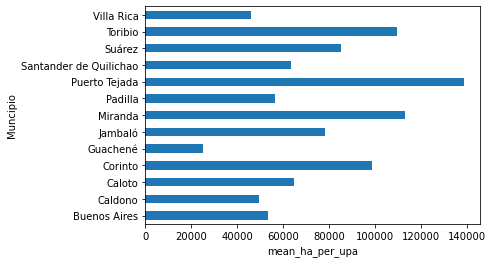

In [113]:
df.plot.barh(legend=False)
plt.xlabel('mean_ha_per_upa')
plt.ylabel('Muncipio')

In [114]:
tqupa_df.groupby('municipio').agg({'municipio': len, 'P_S5PAUTOS': [lambda x: sum(x) / 10000, np.mean]}).rename(columns={'len':'total_upa', '<lambda_0>':'total_ha','mean':'mean_ha_upa'})


municipio    P_S5PAUTOS              
                           total_upa      total_ha   mean_ha_upa
municipio                                                       
Anapoima                        1962  11447.622863  58346.701647
Anolaima                        3207  11483.787035  35808.503383
Apulo                            816   7367.388494  90286.623697
Cachipay                        2476   5178.395990  20914.361832
El Colegio                      6062  11102.976714  18315.698967
La Mesa                         4369  16808.463569  38472.107047
Quipile                         1621  11342.945131  69974.985387
San Antonio Del Tequendama      3808   7520.385969  19748.912735
Tena                            2697   4883.259621  18106.264816
Viotá                           4456  19585.956413  43954.121214

In [116]:
saupa_df.groupby('municipio').agg({'municipio': len, 'P_S5PAUTOS': [lambda x: sum(x) / 10000, np.mean]}).rename(columns={'len':'total_upa', '<lambda_0>':'total_ha','mean':'mean_ha_upa'})

municipio    P_S5PAUTOS               
                 total_upa      total_ha    mean_ha_upa
municipio                                              
Campo De La Cruz      1102   9182.438909   83325.216962
Candelaria             687  12902.622896  187811.104738
Luruaco                675  17249.647657  255550.335658
Manatí                1139  17985.739676  157908.162212
Repelón               1525  21708.655133  142351.836936
Santa Lucía           1149   5268.853925   45855.995867
Suan                   380   3209.854822   84469.863735